Nama : Randi Julian Saputra

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/randiijulian/Pengembangan-Machine-Learning-Dicoding/blob/main/NLP%20Model%20With%20Tensorflow/NLP_Model_with_Tensorflow.ipynb)
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?logo=linkedin)](https://www.linkedin.com/in/randijulian/)
[![Github](https://img.shields.io/badge/GitHub-Profile-lightgrey?logo=github)](https://github.com/randiijulian)
[![Dataset](https://img.shields.io/badge/Dataset-Download-green)](https://www.kaggle.com/datasets/abdallahwagih/emotion-dataset)

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Install Needed Library

In [11]:
#Import Library
import pandas as pd #Pandas to process dataset
from sklearn.model_selection import train_test_split #split dataset into training and validation
from tensorflow.keras.preprocessing.text import Tokenizer #make tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences #make sequences
import tensorflow as tf #tensorflow

In [12]:
!pip install -U -q kaggle # install kaggle for using kaggle
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/ # use API kaggle for import file from kaggle
# download file from kaggle and place to folder dataset
!kaggle datasets download -d abdallahwagih/emotion-dataset -p "/content/"
!ls

Dataset URL: https://www.kaggle.com/datasets/abdallahwagih/emotion-dataset
License(s): Apache 2.0
emotion-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
drive  Emotion_classify_Data.csv  emotion-dataset.zip  sample_data


In [13]:
# Unzip file dataset
import zipfile
local_zip = '/content/emotion-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [14]:
#read dataset
home_data = pd.read_csv('/content/Emotion_classify_Data.csv')
home_data.info()
home_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 0 to 5936
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  5937 non-null   object
 1   Emotion  5937 non-null   object
dtypes: object(2)
memory usage: 92.9+ KB


,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


#Exploratory Data Analysis - Menangani Missing Value dan Outliers

In [15]:
category = pd.get_dummies(home_data.Emotion)
new_data = pd.concat([home_data, category], axis=1)
new_data = new_data.drop(columns='Emotion')
new_data

,Comment,anger,fear,joy
0,i seriously hate one subject to death but now ...,False,True,False
1,im so full of life i feel appalled,True,False,False
2,i sit here to write i start to dig out my feel...,False,True,False
3,ive been really angry with r and i feel like a...,False,False,True
4,i feel suspicious if there is no one outside l...,False,True,False
...,...,...,...,...
5932,i begun to feel distressed for you,False,True,False
5933,i left feeling annoyed and angry thinking that...,True,False,False
5934,i were to ever get married i d have everything...,False,False,True
5935,i feel reluctant in applying there because i w...,False,True,False


In [16]:
text = new_data['Comment'].values
label = new_data[['anger','fear','joy']].values

In [17]:
text

array(['i seriously hate one subject to death but now i feel reluctant to drop it',
       'im so full of life i feel appalled',
       'i sit here to write i start to dig out my feelings and i think that i am afraid to accept the possibility that he might not make it',
       ...,
       'i were to ever get married i d have everything ready to offer to him because i ve got it together and when i do go out to clubs even the perfect good looking guys feel intimated after talking to me about my clever self',
       'i feel reluctant in applying there because i want to be able to find a company where i know at least one person',
       'i just wanted to apologize to you because i feel like a heartless bitch'],
      dtype=object)

In [18]:
label

array([[False,  True, False],
       [ True, False, False],
       [False,  True, False],
       ...,
       [False, False,  True],
       [False,  True, False],
       [ True, False, False]])

In [19]:
from sklearn.model_selection import train_test_split
train_text, test_text, label_train, label_test = train_test_split(text, label, test_size=0.2)

# Modeling

## CNN

In [20]:
import numpy as np
label_train=np.array(label_train)
label_test=np.array(label_test)

In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=1000, oov_token='x')
tokenizer.fit_on_texts(train_text)
tokenizer.fit_on_texts(test_text)

sekuens_latih = tokenizer.texts_to_sequences(train_text)
sekuens_test = tokenizer.texts_to_sequences(test_text)

pad_train=pad_sequences(sekuens_latih,
                        padding='post',
                        maxlen=50,
                        truncating='post')

pad_test=pad_sequences(sekuens_test,
                       padding='post',
                       maxlen=50,
                       truncating='post')
# pad_train = pad_sequences(sekuens_latih, maxlen=100)
# pad_test = pad_sequences(sekuens_test,  maxlen=100)

In [22]:
# #create tokenizer and padding
# tokenizer = Tokenizer(num_words=20000, oov_token='x')
# tokenizer.fit_on_texts(train_text)
# word_index = tokenizer.word_index
# sekuens_train = tokenizer.texts_to_sequences(train_text)
# sekuens_test = tokenizer.texts_to_sequences(test_text)

# padded_train = pad_sequences(sekuens_train,
#                              padding='post',
#                              maxlen=50,
#                              truncating='post')

# padded_test = pad_sequences(sekuens_test,
#                             padding='post',
#                             maxlen=50,
#                             truncating='post')

In [23]:
# import tensorflow as tf
# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(input_dim=20000,output_dim=24),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.LSTM(64),
#     tf.keras.layers.Dense(32,activation='relu'),
#     # tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dense(64,activation='relu'),
#     tf.keras.layers.Dense(64,activation='relu'),
#     tf.keras.layers.Dense(128,activation='relu'),
#     tf.keras.layers.Dense(128,activation='relu'),
#     # tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(3, activation='softmax')
# ])

# model.compile(loss='categorical_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

In [24]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=20000,output_dim=16),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
# reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
#     monitor='val_loss',
#     factor=0.002,
#     patience=20,
#     min_lr=1.5e-6
# )

# early_stop = tf.keras.callbacks.EarlyStopping(
#     monitor="val_loss",
#     min_delta=0,
#     patience=12,
#     verbose=0,
#     mode="auto",
#     baseline=None,
#     restore_best_weights=True)

In [4]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1.5e-5
)

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=12,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True)

In [28]:
num_epochs = 100
history = model.fit(pad_train, label_train, epochs=num_epochs, batch_size=32,callbacks=[reduce_lr, early_stop],
                    validation_data=(pad_test, label_test),verbose=1)

Epoch 1/100
149/149 [==============================] - 17s 83ms/step - loss: 1.0986 - accuracy: 0.3399 - val_loss: 1.1006 - val_accuracy: 0.3544 - lr: 0.0010
Epoch 2/100
149/149 [==============================] - 2s 14ms/step - loss: 1.0991 - accuracy: 0.3228 - val_loss: 1.0980 - val_accuracy: 0.3401 - lr: 0.0010
Epoch 3/100
149/149 [==============================] - 2s 14ms/step - loss: 1.0990 - accuracy: 0.3335 - val_loss: 1.0988 - val_accuracy: 0.3401 - lr: 0.0010
Epoch 4/100
149/149 [==============================] - 2s 13ms/step - loss: 1.1008 - accuracy: 0.3350 - val_loss: 1.0984 - val_accuracy: 0.3392 - lr: 0.0010
Epoch 5/100
149/149 [==============================] - 1s 10ms/step - loss: 1.0986 - accuracy: 0.3346 - val_loss: 1.0979 - val_accuracy: 0.3535 - lr: 0.0010
Epoch 6/100
149/149 [==============================] - 2s 15ms/step - loss: 1.0975 - accuracy: 0.3327 - val_loss: 1.0986 - val_accuracy: 0.3418 - lr: 0.0010
Epoch 7/100
149/149 [==============================] - 2s

In [23]:
# #Callback to avoid overfitting
# class myCallback(tf.keras.callbacks.Callback):
#   def on_epoch_end(self, epoch, logs={}):
#     if(logs.get('accuracy')>0.9 and logs.get('val_accuracy')>0.9):
#       print("\nAkurasi telah lebih dari 90%!")
#       self.model.stop_training = Truecla
#     monitor="val_loss",
#     min_delta=0,
#     patience=12,
#     verbose=0,
#     mode="auto",
#     baseline=None,
#     restore_best_weights=True
# callbacks = myCallback()

In [ ]:
# plot_model = model.fit(
#     padded_train,
#     label_train,
#     epochs=100, #total epoch
#     batch_size=32,
#     callbacks=[reduce_lr, callbacks],
#     validation_data=(padded_test, label_test),
#     verbose=1
#     )

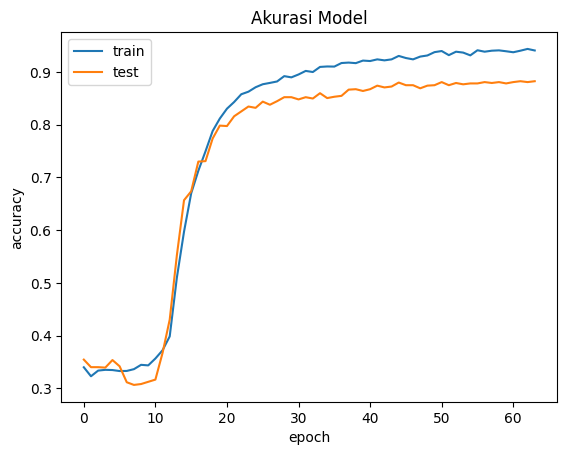

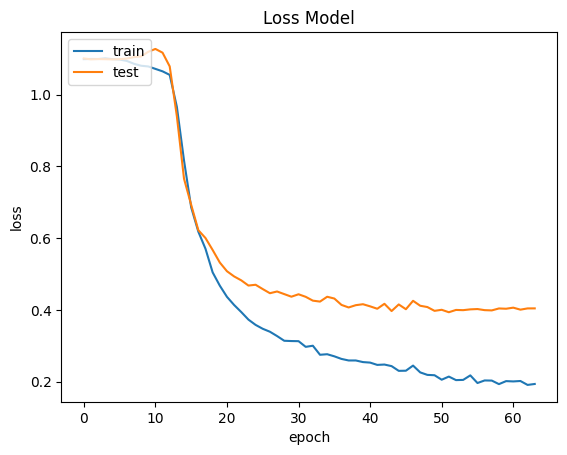

In [32]:
import matplotlib.pyplot as plt
#Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()